# 당뇨병 예측하기
### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 당뇨병 여부(0: 정상, 1: 당뇨병)

## EDA
### 파일 읽어오기, 데이터 확인

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')  #글자 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [30]:
df= pd.read_csv('diabetes.csv')

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* glucose나 insulin의 중위값(50%)과 평균(mesn)이 많이 차이남 (이상치 존재)
* Glucose와 혈압 등 0 이 나올 수 없는 수치가 있음(결측치 존재)

In [33]:
df_null = df.iloc[:,1:-1].replace(0,np.nan) # 0 값을 nan으로 대체
df_null.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot: >

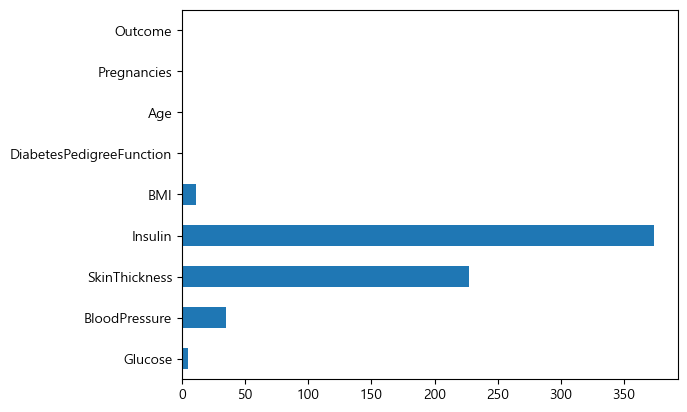

In [34]:
# 결측치
df_null['Pregnancies'] = df['Pregnancies']
df_null['Outcome'] = df['Outcome']
df_null.isnull().sum().plot.barh()

In [35]:
df_null.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,3.845052,0.348958
std,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,3.000000,0.000000
75%,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


### 이상치 시각화
* 중위값과 중간값이 높은 인슐린 확인하기
* max 값이 높은 글루코스, 인슐린 확인하기

## 상관관계

C:\Users\psh_2020\AppData\Local\Temp\ipykernel_25280\325256870.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
C:\Users\psh_2020\AppData\Local\Temp\ipykernel_25280\325256870.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][

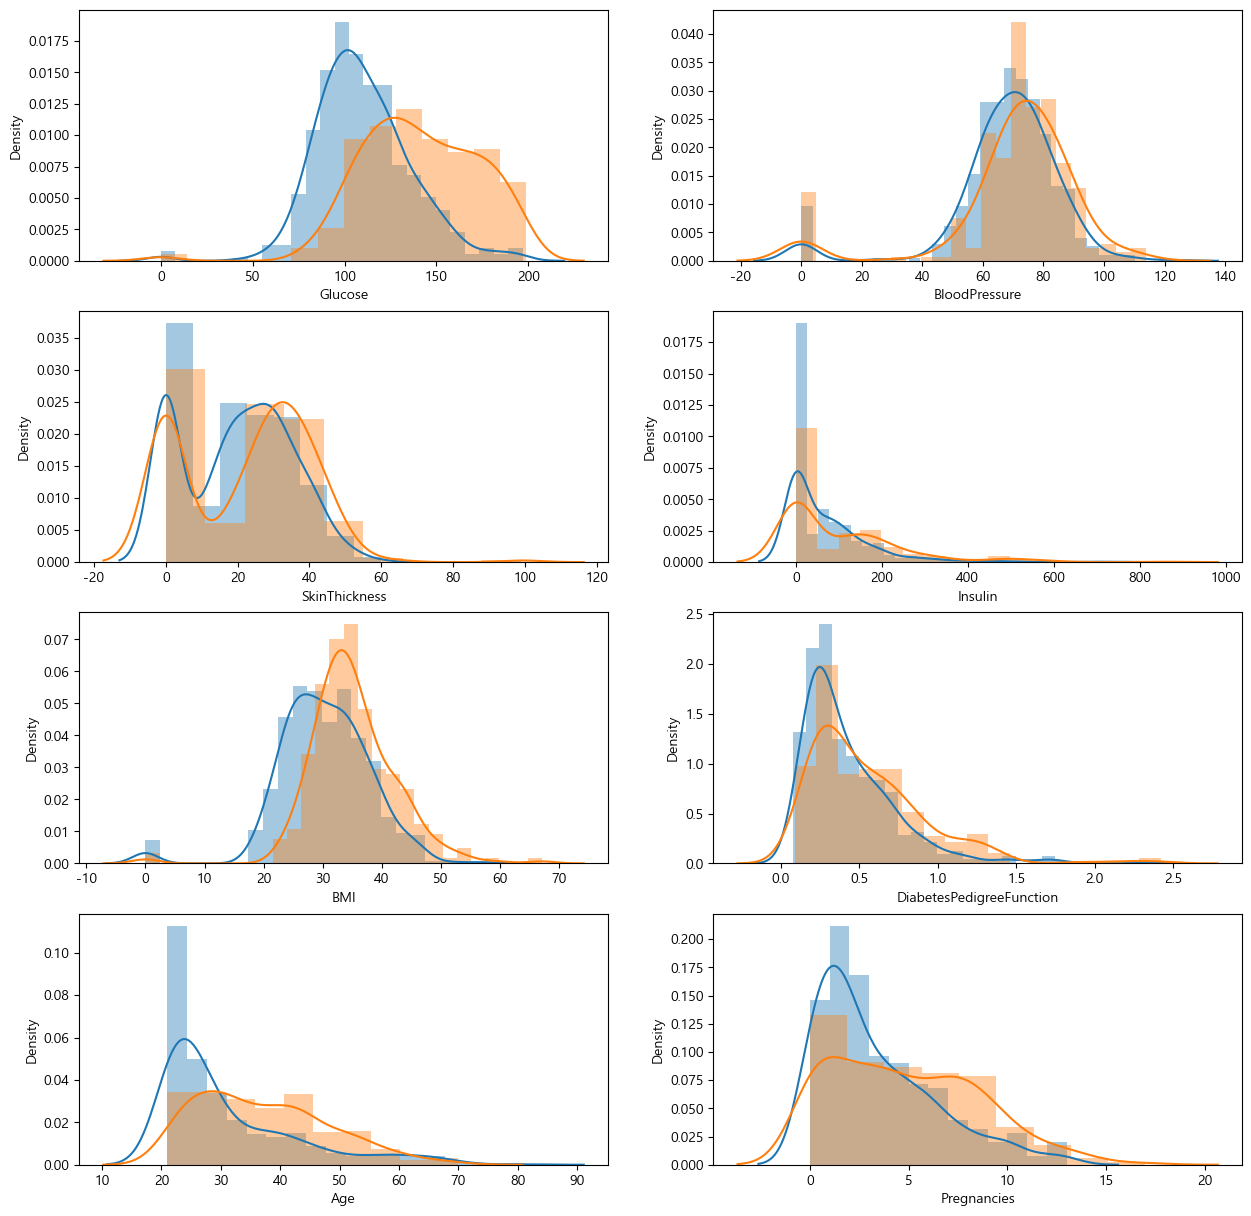

In [36]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
col_num = df_null.columns.shape
cols = df_null.columns[:-1].tolist()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

* bmi/ 혈압,그루코스가 높을 수록 당뇨병이 많이 걸림
* 나이가 30살이 넘을수록 당뇨병 확률이 높아짐

Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
SkinThickness               0.259491
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64

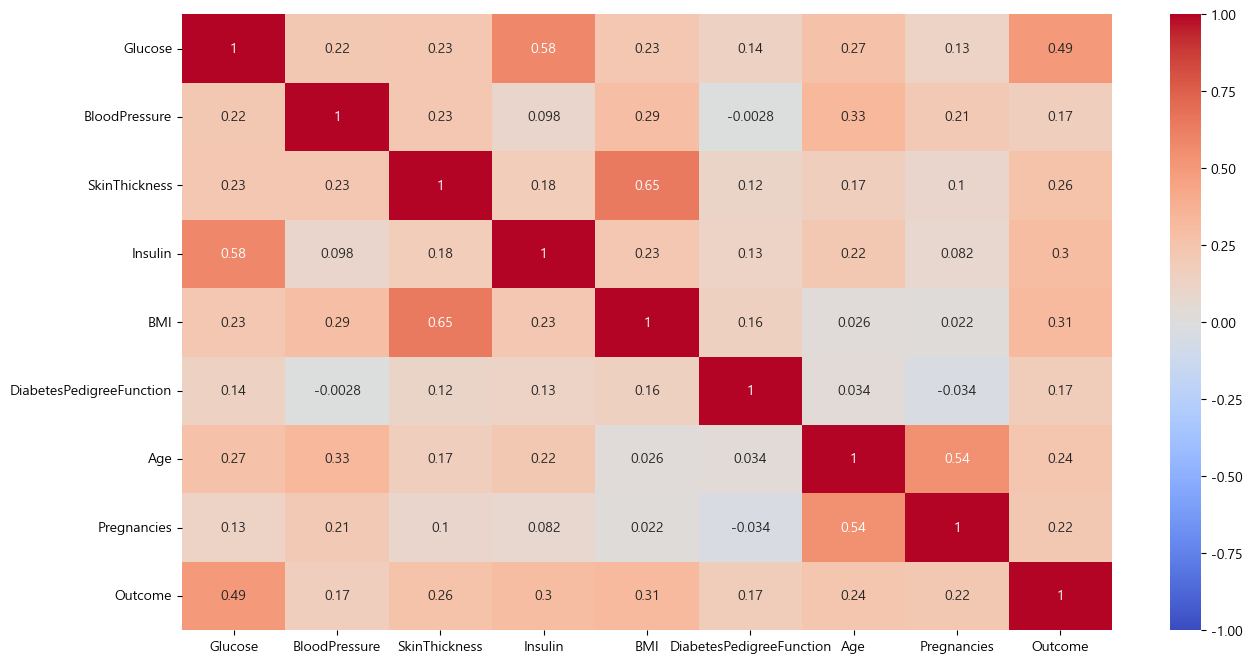

In [37]:
df_null_corr = df_null.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df_null_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")
df_null_corr['Outcome'].sort_values(ascending =False)[1:] # 상관관계높은순으로(outcome은 제외) 

* Glucose, BMI, Insulin 순으로 상관관계가 높음
* BMI와 피부 두께, Insulin 과 Glucose 끼리 상관 관계가 높음

### EDA (상관관계가 높은 값 교체)
* 상관 관계가 높은 Gloucose, insulin 이상치를 제거
* 결측치가 높은 인슐린, 피부주름두께 결측치 중앙값으로 대체

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 

In [39]:
def learn(a):  # 데이터 학습과 학습에 대한 결과값
    global X_train, X_test, y_train, y_test,y_predict,model
    train = a.iloc[:,:-1]
    test = a['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.2,random_state=42)
    model = DecisionTreeRegressor(random_state=42) 
    model.fit(X_train, y_train) #데이터 학습
    y_predict = model.predict(X_test) #정답값 예측
    model.feature_importances_ 
    diff_count = abs(y_test- y_predict).sum() # 정답 맞춘 갯수
    print((len(y_test)-diff_count)/ len(y_test) *100)

In [40]:
# 전처리 하지 않은 데이터의 학습 결과값
learn(df) 

74.67532467532467


In [61]:
def over(df,col):   #이상치 확인하기
    global OUT
    IQR3 = df[col].quantile(0.75)
    IQR1 = df[col].quantile(0.25)
    IQR = IQR3 - IQR1
    OUT = IQR3 + (IQR * 1.5)
    print(OUT)   #이상치 범위
    print(df[df[col]>OUT].shape) # 이상치를 넘어가는 갯수 확인

In [42]:
over(df_null,'Insulin')

360.625
(24, 9)


In [43]:
idx= df[df['Insulin']>OUT].index
df.drop(idx,inplace=True)

In [62]:
over(df_null,'Glucose')

197.75
(2, 9)


* Gl ucose는  max 값과 이상치가 많이 차이 나지 않기 때문에 이상치를 제거하지 않음

In [45]:
# insulin의 이상치 제거 한 후 학습 결과값
learn(df)

75.83892617449665


In [46]:
idx= df_null[df_null['Insulin']>360.625].index
df_null.drop(idx,inplace=True)

In [47]:
df_null.groupby(['Outcome'])['Insulin'].agg(['mean','median'])

,mean,median
Outcome,,
0,115.917323,100.0
1,169.163793,160.0


### insulin의 결측치 변경
 * median과 mean을 비교하여 결측치에 넣을 값 구하기

In [48]:
from copy import copy
df_mean =copy(df)
df_median = copy(df)

In [49]:
df_mean.loc[((df_mean['Outcome']==1)& (df_mean['Insulin']==0)), 'Insulin'] = 169.1
df_mean.loc[((df_mean['Outcome']==0)& (df_mean['Insulin']==0)), 'Insulin'] = 115.9 

In [50]:
learn(df_mean)

86.57718120805369


In [51]:
df_median.loc[((df_median['Outcome']==1)& (df_median['Insulin']==0)), 'Insulin'] = 160.0
df_median.loc[((df_median['Outcome']==0)& (df_median['Insulin']==0)), 'Insulin'] = 100.0 

In [52]:
learn(df_median)

89.26174496644296


In [53]:
#정확도가 높은 median 값으로 변경
df.loc[((df['Outcome']==1)& (df['Insulin']==0)), 'Insulin'] = 160.0
df.loc[((df['Outcome']==0)& (df['Insulin']==0)), 'Insulin'] = 100.0

In [54]:
learn(df)

89.26174496644296


 ## 데이터 학습하기 
 * 학습에 이용할 최적의 모델과 파라미터값 구하기

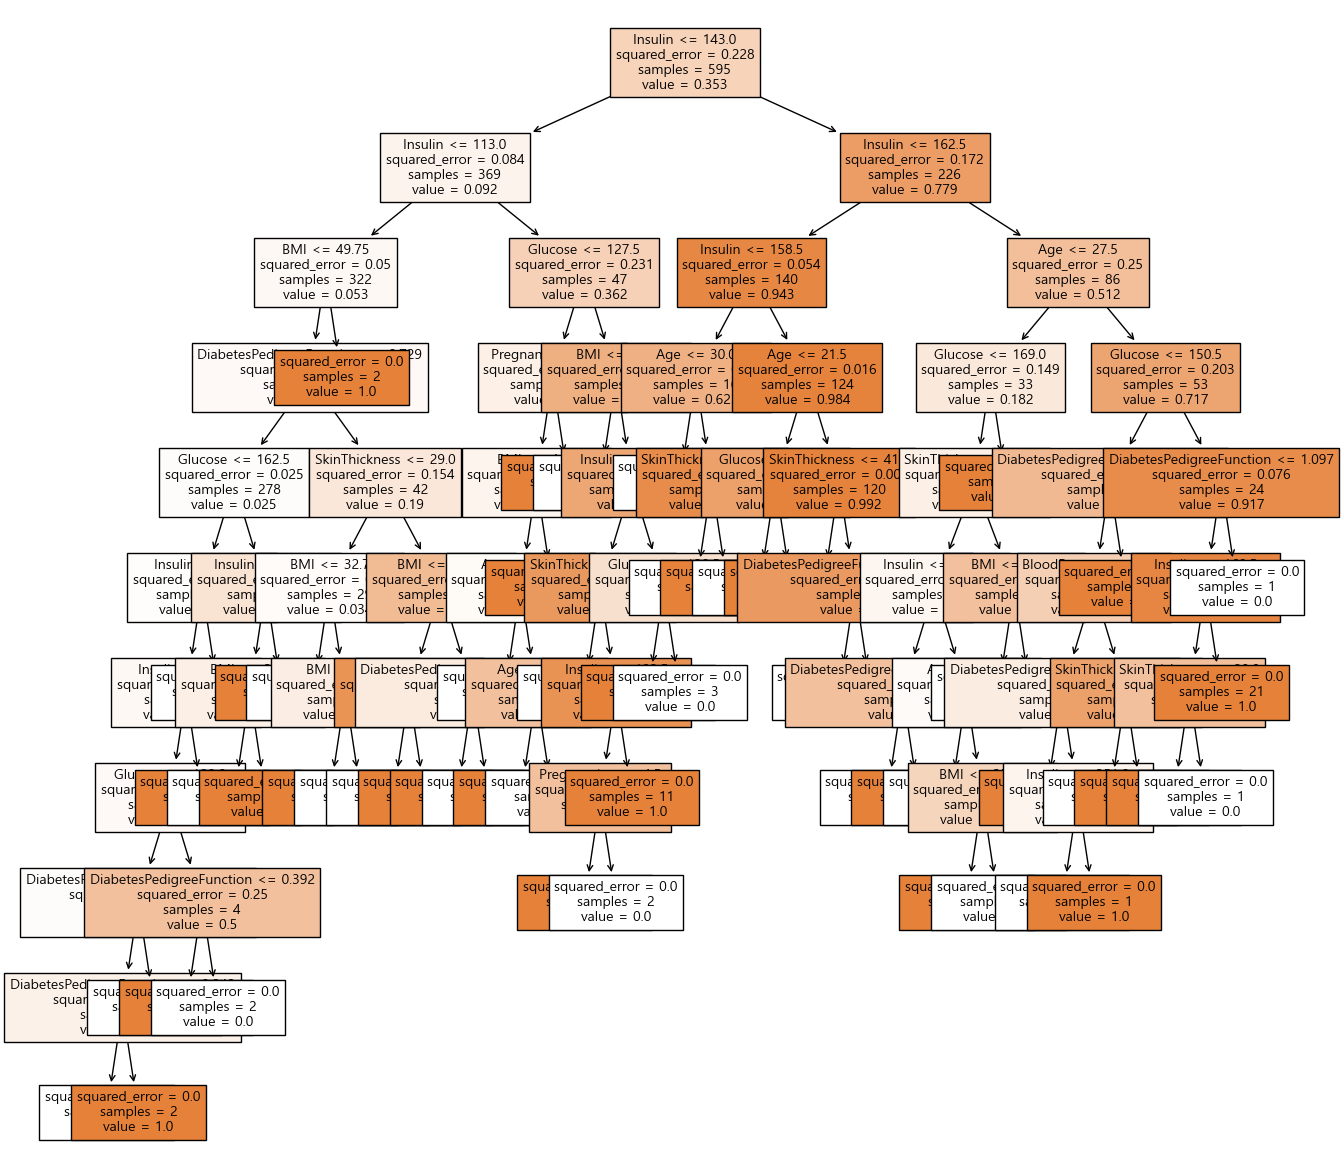

In [55]:
from sklearn.tree import plot_tree

feature_names = X_train.columns.tolist()
plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [56]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

estimators = [DecisionTreeClassifier(random_state=42),
RandomForestClassifier(random_state=42),
GradientBoostingClassifier(random_state=42)
]
estimators

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [57]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.9471582487882486, 'max_dept...",0.872269,0.865772,"{'mean_fit_time': [0.005386066436767578, 0.007..."
1,RandomForestClassifier,"{'n_estimators': 134, 'max_features': 0.562043...",0.904202,0.879195,"{'mean_fit_time': [0.37041072845458983, 0.3769..."
2,GradientBoostingClassifier,"{'n_estimators': 107, 'max_features': 0.304717...",0.895798,0.872483,"{'mean_fit_time': [0.6492634296417237, 0.31396..."


In [58]:
best =pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")
best

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.328322,0.004695,0.019548,0.000798,134,0.562044,4,"{'n_estimators': 134, 'max_features': 0.562043...",0.899160,0.873950,0.932773,0.907563,0.907563,0.904202,0.018865,1
67,0.404518,0.004397,0.026529,0.001492,151,0.304718,5,"{'n_estimators': 151, 'max_features': 0.304717...",0.882353,0.882353,0.915966,0.907563,0.924370,0.902521,0.017304,2
91,0.532376,0.010237,0.031516,0.002721,191,0.562044,4,"{'n_estimators': 191, 'max_features': 0.562043...",0.899160,0.873950,0.932773,0.899160,0.907563,0.902521,0.018865,2
2,0.278256,0.012409,0.016157,0.001934,101,0.652769,4,"{'n_estimators': 101, 'max_features': 0.652768...",0.899160,0.873950,0.924370,0.899160,0.907563,0.900840,0.016295,4
75,0.601192,0.016012,0.031915,0.004136,168,0.907528,5,"{'n_estimators': 168, 'max_features': 0.907528...",0.882353,0.873950,0.915966,0.907563,0.924370,0.900840,0.019455,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.358042,0.005883,0.026728,0.000746,155,0.347028,2,"{'n_estimators': 155, 'max_features': 0.347027...",0.831933,0.848739,0.899160,0.890756,0.873950,0.868908,0.025266,95
50,0.383175,0.006537,0.026330,0.001017,168,0.347028,2,"{'n_estimators': 168, 'max_features': 0.347027...",0.823529,0.848739,0.899160,0.890756,0.873950,0.867227,0.027820,97
39,0.361234,0.005022,0.022141,0.000399,158,0.907528,2,"{'n_estimators': 158, 'max_features': 0.907528...",0.806723,0.848739,0.899160,0.890756,0.882353,0.865546,0.034031,98
46,0.330317,0.017565,0.022739,0.004983,134,0.907528,2,"{'n_estimators': 134, 'max_features': 0.907528...",0.806723,0.848739,0.899160,0.890756,0.882353,0.865546,0.034031,98


In [59]:
best['params'][0]

{'n_estimators': 134, 'max_features': 0.9075281183265291, 'max_depth': 3}

* DicisionTree를 사용하고 모델을 사용하여 tree의 깊이를 3으로 할때 가장 좋은 모델이 나옴